Mean Squared Error (MSE) on Test Data: 58344.81765463701


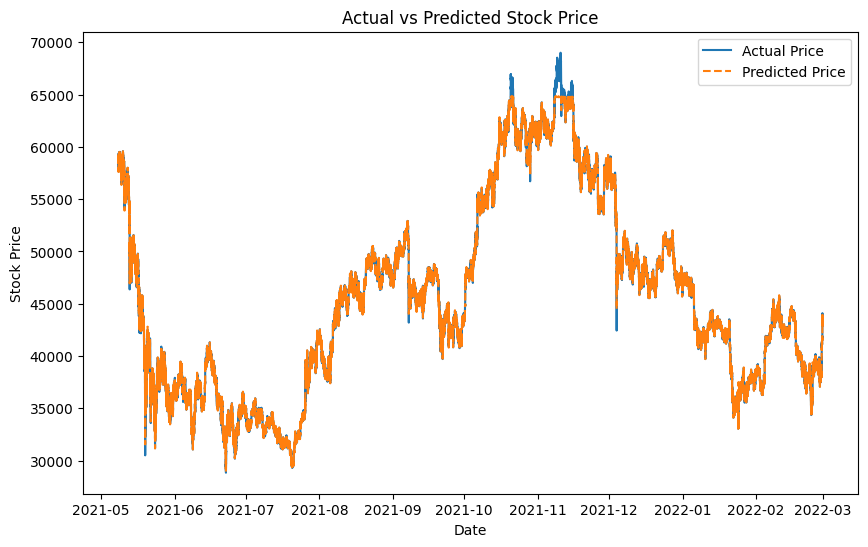

In [2]:
# Required Libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load Dataset
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Preprocessing: Convert 'date' column to datetime and extract useful features
def preprocess_data(data):
    data['date'] = pd.to_datetime(data['date'])
    # Add useful time features, like year, month, and day if needed
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    # Remove rows with missing values (NaN)
    data = data.dropna()
    return data

# Preprocess the training and testing data (removing NaN values)
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Correct Feature and Target Selection
features = ['open', 'high', 'low', 'Volume BTC', 'Volume USD']  # Ensure these names match exactly
target = 'close'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = rf_model.predict(X_test)

# Evaluate Model - Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) on Test Data: {mse}')

# Optional: Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(test_data['date'], y_test, label='Actual Price')
plt.plot(test_data['date'], y_pred, label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.show()
